In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#no dado original, havia uma coluna sem nome (com os indexes). seria difícil remover assim. Nomeei-a de "A", para priorizar 
#o index do pandas.

# Função para normalizar todas as colunas de um dataframe pelo método de valor mínimo 0 e máximo 1
def normalizar(df):
    resultado = df.copy()
    for coluna in df.columns:
        if df[coluna].max() == 0:
            continue
        else:
            valor_max = df[coluna].max()
            valor_min = df[coluna].min()
            resultado[coluna] = (df[coluna] - valor_min) / (valor_max - valor_min)
    return resultado


In [31]:
#criando o DataFrame "df_chem" (e talvez outros DataFrames)
df = pd.read_csv("Minerals_Database3.csv")  # Importação do dataset para ser utilizado como dataframe
# Remoção de colunas não necessárias para o dataframe

df = df.drop(['A'], axis=1)
df = df.drop(['Name'], axis=1)

dados_cat = df.reindex(df.columns[[0,2,4]], axis = 1)
newlist = [x for x in range(7,135)]
porcent_df = df.reindex(df.columns[newlist], axis = 1)
df_chem = df.reindex(df.columns[[1,3,5,6,135,136,137]], axis=1)
df_chem.shape
dados_cat, df_chem, porcent_df

(      Crystal Structure  Diaphaneity  Optical
 0                   5.0          0.0      3.0
 1                   4.0          3.0      3.0
 2                   5.0          3.0      3.0
 3                   0.0          0.0      0.0
 4                   2.0          2.0      4.0
 ...                 ...          ...      ...
 3107                0.0          0.0      0.0
 3108                0.0          0.0      0.0
 3109                0.0          0.0      0.0
 3110                0.0          0.0      0.0
 3111                0.0          0.0      0.0
 
 [3112 rows x 3 columns],
       Mohs Hardness  Specific Gravity  Refractive Index  Dispersion  \
 0              4.50             3.240             1.580         0.0   
 1              2.75             3.446             1.592         0.0   
 2              2.00             4.420             2.085         0.0   
 3              0.00             0.000             0.000         0.0   
 4              5.50             1.050          

In [61]:
# Computação e análise descritiva e estatística dos dados

# Valores de média, desvio padrão, mínimos e máximos, Q1, mediana e Q3
print(df_chem.describe())

# Moda do dataframe
df_chem.mode

       Mohs Hardness  Specific Gravity  Refractive Index   Dispersion  \
count    3112.000000       3112.000000       3112.000000  3112.000000   
mean        0.845925          0.666800          0.323626     0.000459   
std         1.844267          1.481692          0.678769     0.006851   
min         0.000000          0.000000          0.000000     0.000000   
25%         0.000000          0.000000          0.000000     0.000000   
50%         0.000000          0.000000          0.000000     0.000000   
75%         0.000000          0.000000          0.000000     0.000000   
max         9.500000          9.593000          3.383000     0.213000   

         Molar Mass  Molar Volume  Calculated Density  
count   3112.000000   3112.000000          3112.00000  
mean     607.052968      0.110810             5.28411  
std      673.908663      0.117827             2.86038  
min        1.007940      0.011030             0.07500  
25%      239.417117      0.044832             3.15475  
50%   

<bound method DataFrame.mode of       Mohs Hardness  Specific Gravity  Refractive Index  Dispersion  \
0              4.50             3.240             1.580         0.0   
1              2.75             3.446             1.592         0.0   
2              2.00             4.420             2.085         0.0   
3              0.00             0.000             0.000         0.0   
4              5.50             1.050             1.634         0.0   
...             ...               ...               ...         ...   
3107           0.00             0.000             0.000         0.0   
3108           0.00             0.000             0.000         0.0   
3109           0.00             0.000             0.000         0.0   
3110           0.00             0.000             0.000         0.0   
3111           0.00             0.000             0.000         0.0   

       Molar Mass  Molar Volume  Calculated Density  
0      817.339002      0.123390               5.498  
1      

### Sobre a análise estatística

Vimos que o índice refrativo e a óptica apresentaram diferença signifcativa, o que era o contrário do esperado pois esperávamos que os dois atributos estariam relacionados um com outro, já que ambos são propriedades da luz.
Além disso, foi somente depois que percebemos que a maior parte dos dados são qualitativos, ao invés de quantitaivos.

In [7]:
# Matriz de Covariância: 
df_covariado = df_chem.cov()
df_covariado

,Crystal Structure,Mohs Hardness,Diaphaneity,Specific Gravity,Optical,Refractive Index,Dispersion,Molar Mass,Molar Volume,Calculated Density
Crystal Structure,1.928139,1.868906,0.883713,1.486509,1.404906,0.687722,0.001534,-113.519250,-0.016859,-0.156698
Mohs Hardness,1.868906,3.401321,1.132744,2.054427,2.087329,0.990648,0.002035,-131.738616,-0.017411,-0.297824
Diaphaneity,0.883713,1.132744,0.770825,0.925688,1.039486,0.479675,0.000473,-53.645384,-0.004693,-0.217657
Specific Gravity,1.486509,2.054427,0.925688,2.195412,1.682752,0.814336,0.001863,-105.310501,-0.017733,0.077014
Optical,1.404906,2.087329,1.039486,1.682752,2.122172,0.913935,0.001135,-87.926406,-0.005750,-0.405795
Refractive Index,0.687722,0.990648,0.479675,0.814336,0.913935,0.460728,0.000807,-42.669811,-0.004611,-0.111379
Dispersion,0.001534,0.002035,0.000473,0.001863,0.001135,0.000807,0.000047,-0.175538,-0.000035,0.000499
Molar Mass,-113.519250,-131.738616,-53.645384,-105.310501,-87.926406,-42.669811,-0.175538,454152.886460,59.449403,450.883804
Molar Volume,-0.016859,-0.017411,-0.004693,-0.017733,-0.005750,-0.004611,-0.000035,59.449403,0.013883,-0.081704
Calculated Density,-0.156698,-0.297824,-0.217657,0.077014,-0.405795,-0.111379,0.000499,450.883804,-0.081704,8.181771


In [15]:
# Normalização dos dados na relaçãao de 0 a 1

df_normalizado = normalizar(df_chem)
df_normalizado

,Mohs Hardness,Specific Gravity,Refractive Index,Dispersion,Molar Mass,Molar Volume,Calculated Density
0,0.473684,0.337746,0.467041,0.0,0.057323,0.057586,0.389835
1,0.289474,0.359220,0.470588,0.0,0.030480,0.023090,0.457480
2,0.210526,0.460753,0.616317,0.0,0.064609,0.057197,0.442743
3,0.000000,0.000000,0.000000,0.0,0.038552,0.011597,0.969592
4,0.578947,0.109455,0.483003,0.0,0.060402,0.051786,0.453095
...,...,...,...,...,...,...,...
3107,0.000000,0.000000,0.000000,0.0,0.047475,0.028843,0.594781
3108,0.000000,0.000000,0.000000,0.0,0.070548,0.137955,0.208756
3109,0.000000,0.000000,0.000000,0.0,0.072792,0.086328,0.339587
3110,0.000000,0.000000,0.000000,0.0,0.015775,0.023056,0.234994


In [32]:
#relação de Pearson
def Pearson(DataFrame):
    data = DataFrame
    data.shape
    
    corrmat = data.corr()
    f, ax = plt.subplots(figsize =(32, 18))
    sns.heatmap(corrmat, ax = ax, cmap ="RdYlBu", linewidths = 0.1, vmin=-1, vmax=1, annot=True)

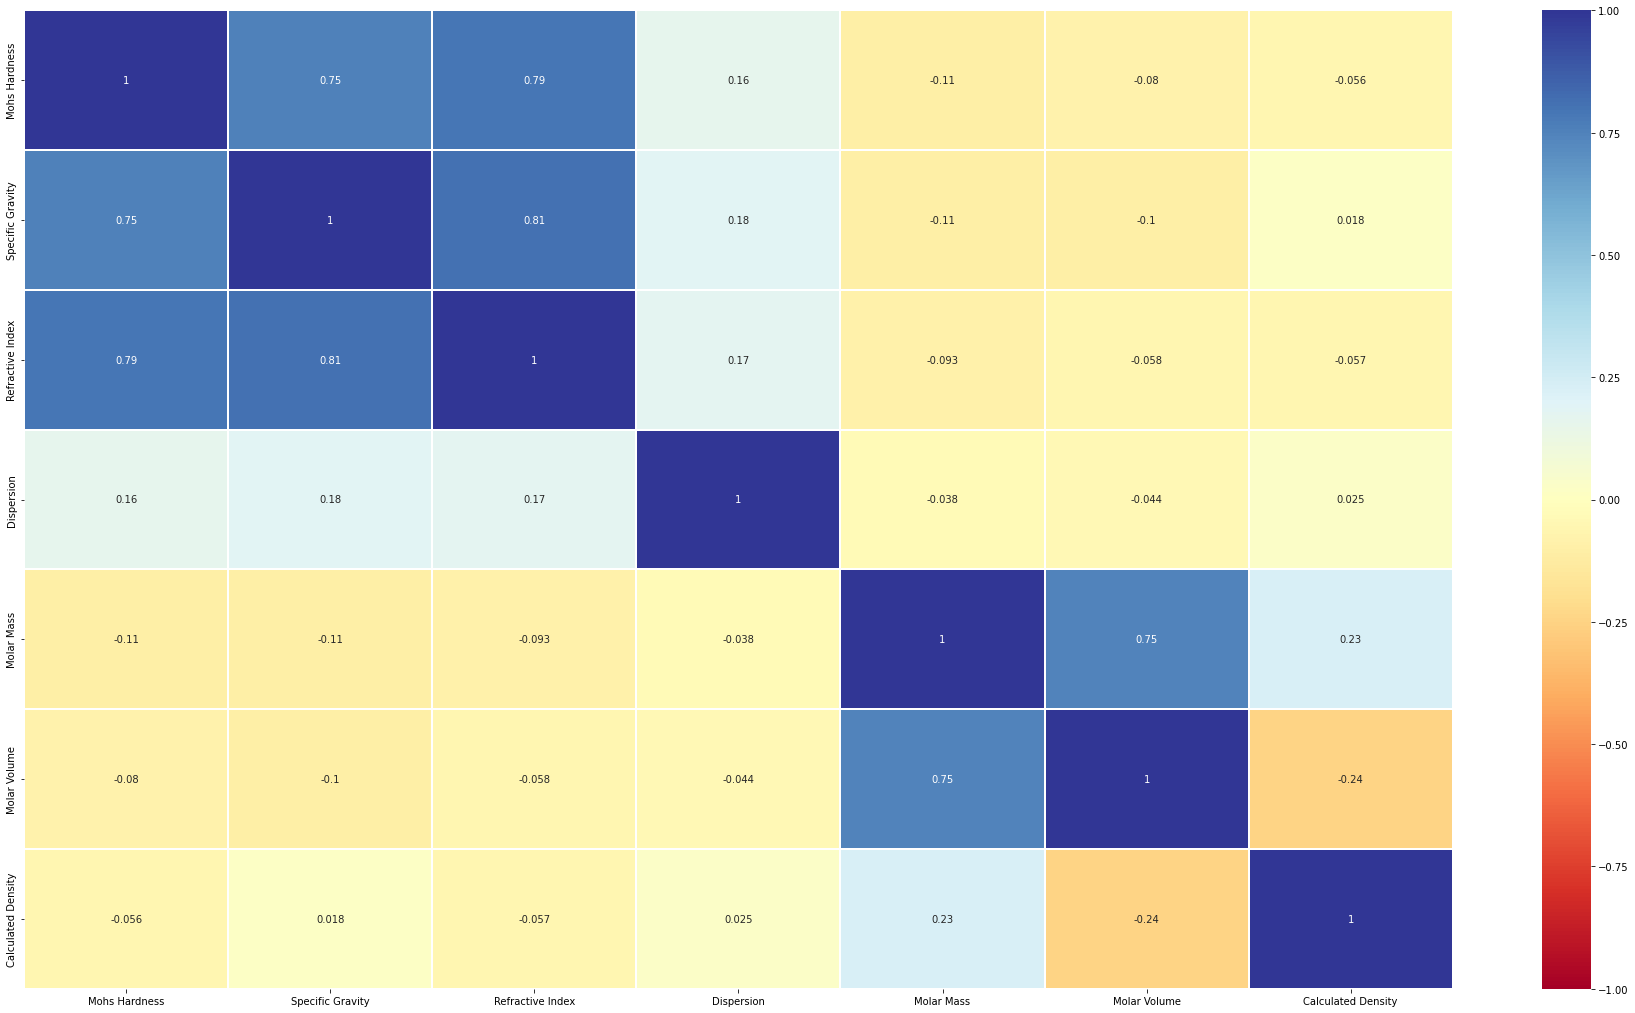

In [42]:
Pearson(df_normalizado)

In [34]:
#correlação de Spearman
import numpy as np
from scipy.stats import spearmanr #x e y
def Spearman(DataFrame, tam_matrizx,tam_matrizy):
    matriz = np.zeros((tam_matrizx,tam_matrizy))
#spearmat = pd.DataFrame(a,columns=df_chem.columns)
#print(a)
    for i in range(0,tam_matrizx):
        for j in range(0,tam_matrizy):
            if i >= j:
                x = DataFrame.iloc[:,i]
                y = DataFrame.iloc[:,j]
            
                dados_tratados = spearmanr(x,y)[0]
            #print(b)
                matriz[i,j] = dados_tratados
                matriz[j,i] = dados_tratados
            
    spearmat = pd.DataFrame(matriz,columns=DataFrame.columns, index=DataFrame.columns)            
    f, ax = plt.subplots(figsize =(32, 18))
    sns.heatmap(spearmat, ax = ax, cmap ="RdYlBu", linewidths = 0.1, vmin=-1, vmax=1, annot=True)


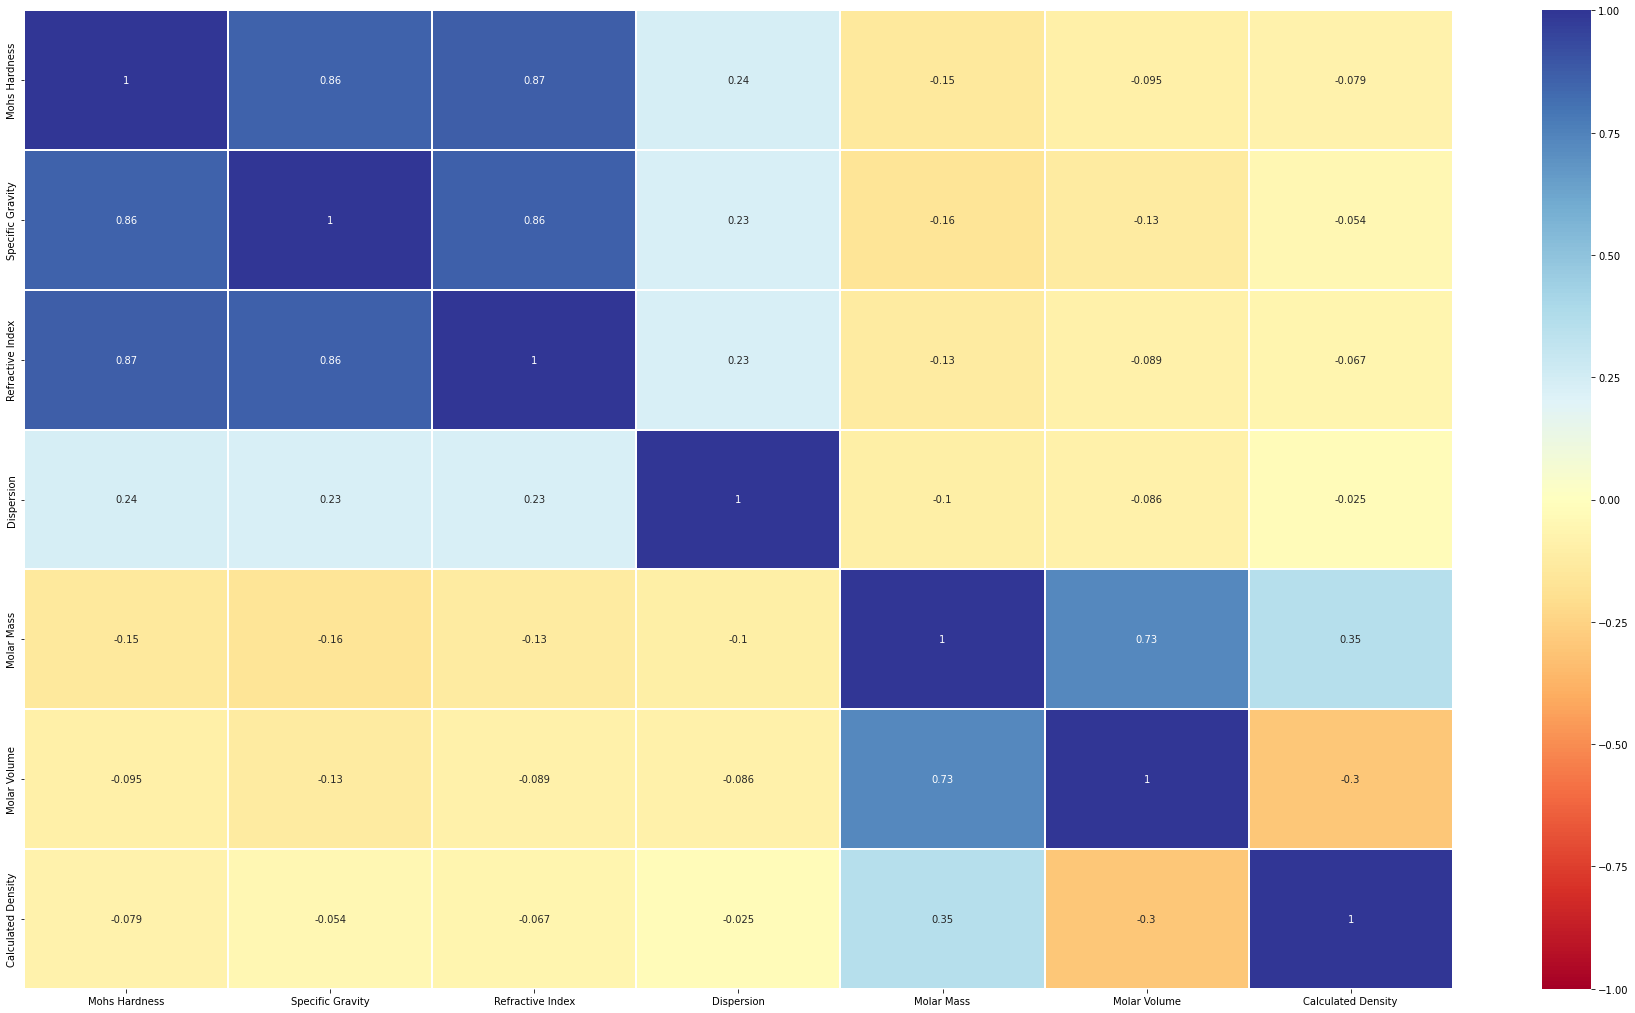

In [43]:
Spearman(df_normalizado,7,7)

,Mohs Hardness,Specific Gravity,Refractive Index,Dispersion,Molar Mass,Molar Volume,Calculated Density
0,0.473684,0.337746,0.467041,0.0,0.057323,0.057586,0.389835
1,0.289474,0.359220,0.470588,0.0,0.030480,0.023090,0.457480
2,0.210526,0.460753,0.616317,0.0,0.064609,0.057197,0.442743
3,0.000000,0.000000,0.000000,0.0,0.038552,0.011597,0.969592
4,0.578947,0.109455,0.483003,0.0,0.060402,0.051786,0.453095
...,...,...,...,...,...,...,...
3107,0.000000,0.000000,0.000000,0.0,0.047475,0.028843,0.594781
3108,0.000000,0.000000,0.000000,0.0,0.070548,0.137955,0.208756
3109,0.000000,0.000000,0.000000,0.0,0.072792,0.086328,0.339587
3110,0.000000,0.000000,0.000000,0.0,0.015775,0.023056,0.234994


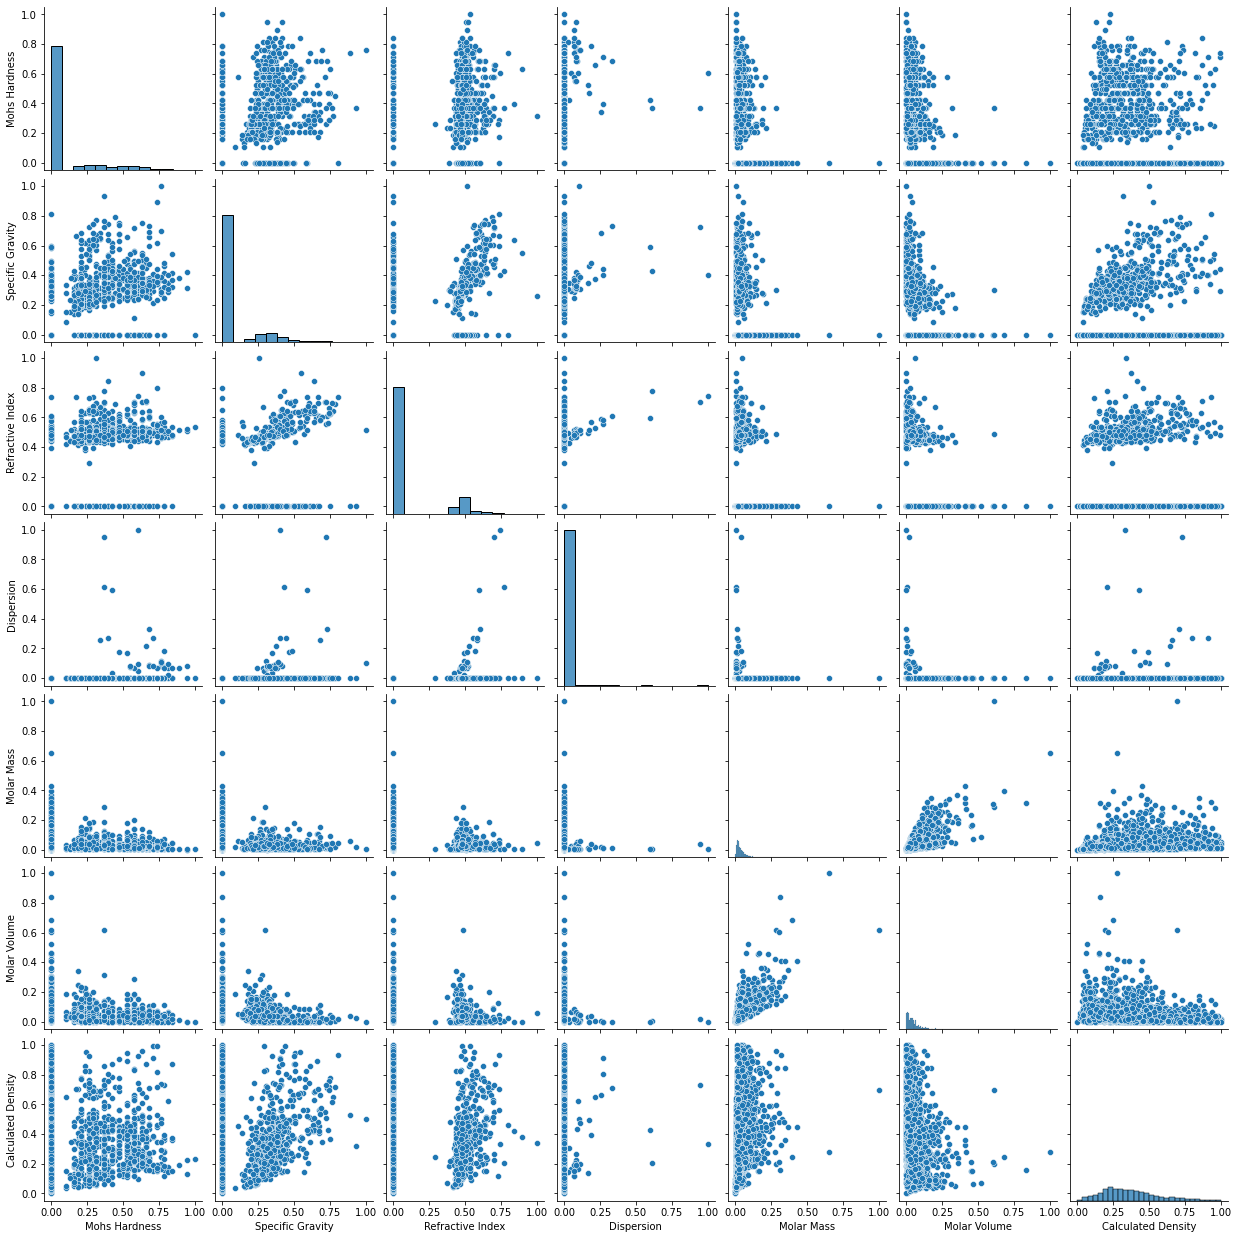

In [44]:
sns.pairplot(data = df_normalizado)
df_normalizado

In [19]:
#sns.pairplot(data = df_tratado)
#df_chem2 = df_chem["Mohs Hardness"]
#sns.pairplot(data = df_chem["Mohs Hardness"])

<AxesSubplot:xlabel='Specific Gravity', ylabel='Mohs Hardness'>

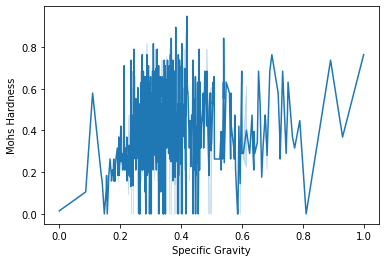

In [54]:
sns.lineplot(data = df_normalizado, y='Mohs Hardness', x='Specific Gravity')

<AxesSubplot:xlabel='Optical', ylabel='Refractive Index'>

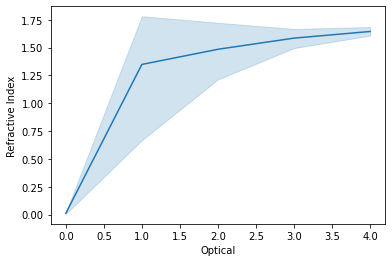

In [16]:
sns.lineplot(data = df_chem, x='Optical',y='Refractive Index')

<AxesSubplot:xlabel='Crystal Structure', ylabel='Refractive Index'>

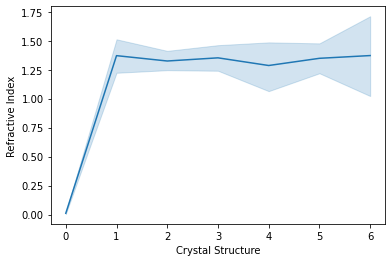

In [17]:
sns.lineplot(data = df_chem, y="Refractive Index", x="Crystal Structure")

<AxesSubplot:xlabel='Optical', ylabel='Refractive Index'>

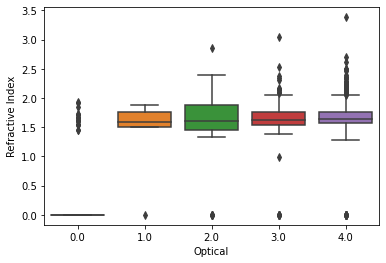

In [18]:
sns.boxplot(data = df_chem, x='Optical',y='Refractive Index')

**Estrutura cristalina:** 0.05-Triclinic,0.15-Monoclinic, 0.30-Orthorhombic, 0.45-Tetragonal, 0.60-Hexagonal, 0.75-Trigonal,0.9-Cubic, 1-Amorphous.

**Mohs Hardness:** 0.3-Baixa dureza, 1-Extrema dureza

**Diafaneidade:** 0.3-Opaco, 0.6-Translúcido, 1-Transparente

**Ótica:** 0.25-Anisotrópico, 0.5-Isotrópico, 0.75-Uniaxial, 1-Biaxial

**Índice refrativo:** 0-Não refrate muita luz, 1-Refrate muita luz

**Dispersão:** 0-Frequência de mudança do índice refrativo baixa, 1-Frequência de mudança do índice refrativo alta

**Gravidade Específica:** 0-Densidade do material dividido pela densidade da água muito baixa, 1-Densidade do material dividido pela densidade da água alta